In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='digi.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('digi.zip')
f.keys()
!unzip digi.zip

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
data_dir='/content/bangla-digit/Bangla'
data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 3601 files belonging to 10 classes.


In [ ]:
datagen = ImageDataGenerator(
        rescale = 1./255,
      )

In [ ]:
train_data = datagen.flow_from_directorydirectory=(data_dir,
    shuffle=True,
    image_size=picture_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training')

val_data = datagen.flow_from_directorydirectory=(data_dir,
    shuffle=True,
    image_size=picture_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation')

In [ ]:
SIZE=124


img_augmentation = Sequential(
    [
        RandomRotation(factor=0.15),
        RandomTranslation(height_factor=0.1, width_factor=0.1),
        RandomFlip(),
        RandomZoom(height_factor=0.2)
    ],
    name="img_augmentation"
    )

    base_model = tf.keras.applications.EfficientNetB0(weights="imagenet", input_shape=(SIZE, SIZE, 3), include_top=False)
    for layer in base_model.layers:
      layer.trainable = True
    inputs = Input(shape=(SIZE, SIZE, 3))
    x = img_augmentation(inputs)
    outputs = base_model(x)

    x = GlobalAveragePooling2D()(outputs)
    x = Dense(512, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    predictions = Dense(no_of_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=predictions)


model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Model

In [ ]:
model.summary()

In [ ]:
batch_size=16
STEP_SIZE_TRAIN = train_data.n // train_data.batch_size
STEP_SIZE_VALID = val_data.n // val_data.batch_size
his=model.fit(train_data,
                    validation_data = val_data,
                    epochs = 16,
                    verbose = 1)

Epoch 1/16
102/102 [==============================] - 50s 403ms/step - loss: 0.8111 - accuracy: 0.7473 - val_loss: 0.4111 - val_accuracy: 0.8736
Epoch 2/16
102/102 [==============================] - 19s 187ms/step - loss: 0.2455 - accuracy: 0.9300 - val_loss: 0.3362 - val_accuracy: 0.9073
Epoch 3/16
102/102 [==============================] - 19s 188ms/step - loss: 0.1330 - accuracy: 0.9618 - val_loss: 0.1861 - val_accuracy: 0.9382
Epoch 4/16
102/102 [==============================] - 19s 184ms/step - loss: 0.1255 - accuracy: 0.9633 - val_loss: 0.1661 - val_accuracy: 0.9438
Epoch 5/16
102/102 [==============================] - 19s 189ms/step - loss: 0.0728 - accuracy: 0.9815 - val_loss: 0.1114 - val_accuracy: 0.9579
Epoch 6/16
102/102 [==============================] - 19s 185ms/step - loss: 0.0665 - accuracy: 0.9803 - val_loss: 0.1826 - val_accuracy: 0.9298
Epoch 7/16
102/102 [==============================] - 19s 189ms/step - loss: 0.0527 - accuracy: 0.9858 - val_loss: 0.1925 - val_ac

In [ ]:
results=model.evaluate(val_data)
results

12/12 [==============================] - 2s 171ms/step - loss: 0.1365 - accuracy: 0.9607


[0.13652348518371582, 0.9606741666793823]

In [ ]:
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)
classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
model_name = 'mymodel.h5'
model.save(model_name, save_format='h5')

1/1 [==============================] - 1s 1s/step


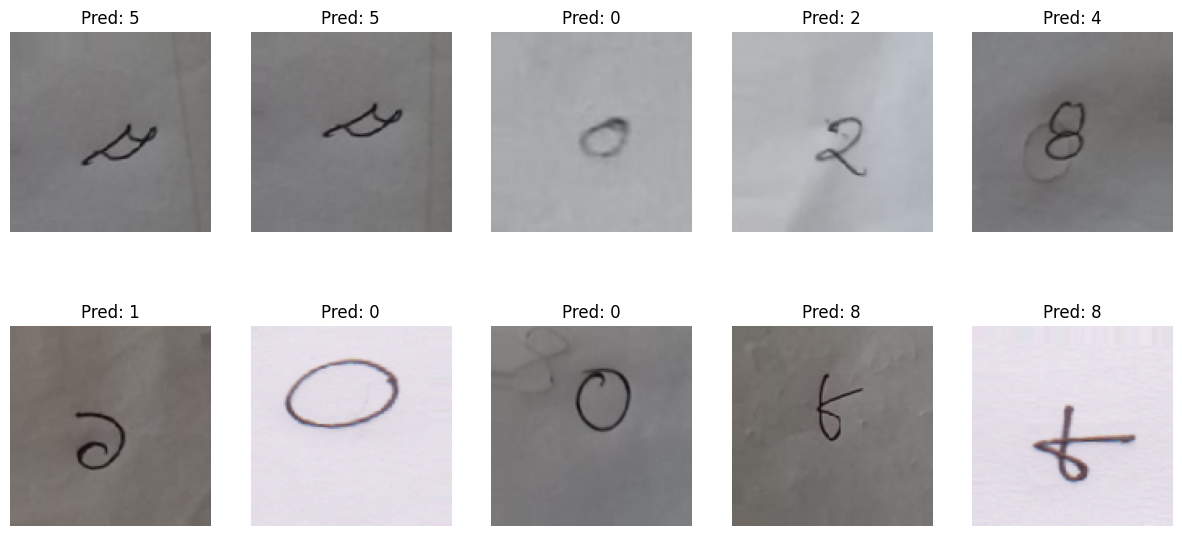

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Get a batch of 10 random images from the test set
test_batch = train_data.next()
images = test_batch[0][:10]
true_labels = test_batch[1][:10]

# Make predictions using the trained model
pred_probs = model.predict(images)
pred_labels = np.argmax(pred_probs, axis=1)

# Plot the images with their true and predicted labels
fig, axs = plt.subplots(2, 5, figsize=(15, 7))
axs = axs.flatten()

for i in range(len(images)):
    # Rescale the pixel values from [0, 1] to [0, 255] and convert to integers
    img = (images[i] * 255).astype(np.uint8)
    axs[i].imshow(img)
    axs[i].set_title(f'Pred: {pred_labels[i]}')
    axs[i].axis('off')